In [2]:
import pandas as pd 


C:\Users\Админ\AppData\Local\Temp\ipykernel_11896\1362986570.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df = df.dropna(subset=['Description', 'CustomerID'])

In [9]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [11]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
unique_products_count = df['Description'].nunique()
unique_products_count

3896

In [13]:
product_counts = df['Description'].value_counts()
product_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: count, Length: 3896, dtype: int64

In [14]:
quantity_by_country= df.groupby('Country')['Quantity'].sum().reset_index()

In [15]:
quantity_by_stockCode= df.groupby('StockCode')['Quantity'].sum().reset_index()

In [16]:
avg_price_by_country= df.groupby('Country')['UnitPrice'].mean().reset_index()

In [17]:
avg_price_by_stockCode= df.groupby('StockCode')['UnitPrice'].mean().reset_index()

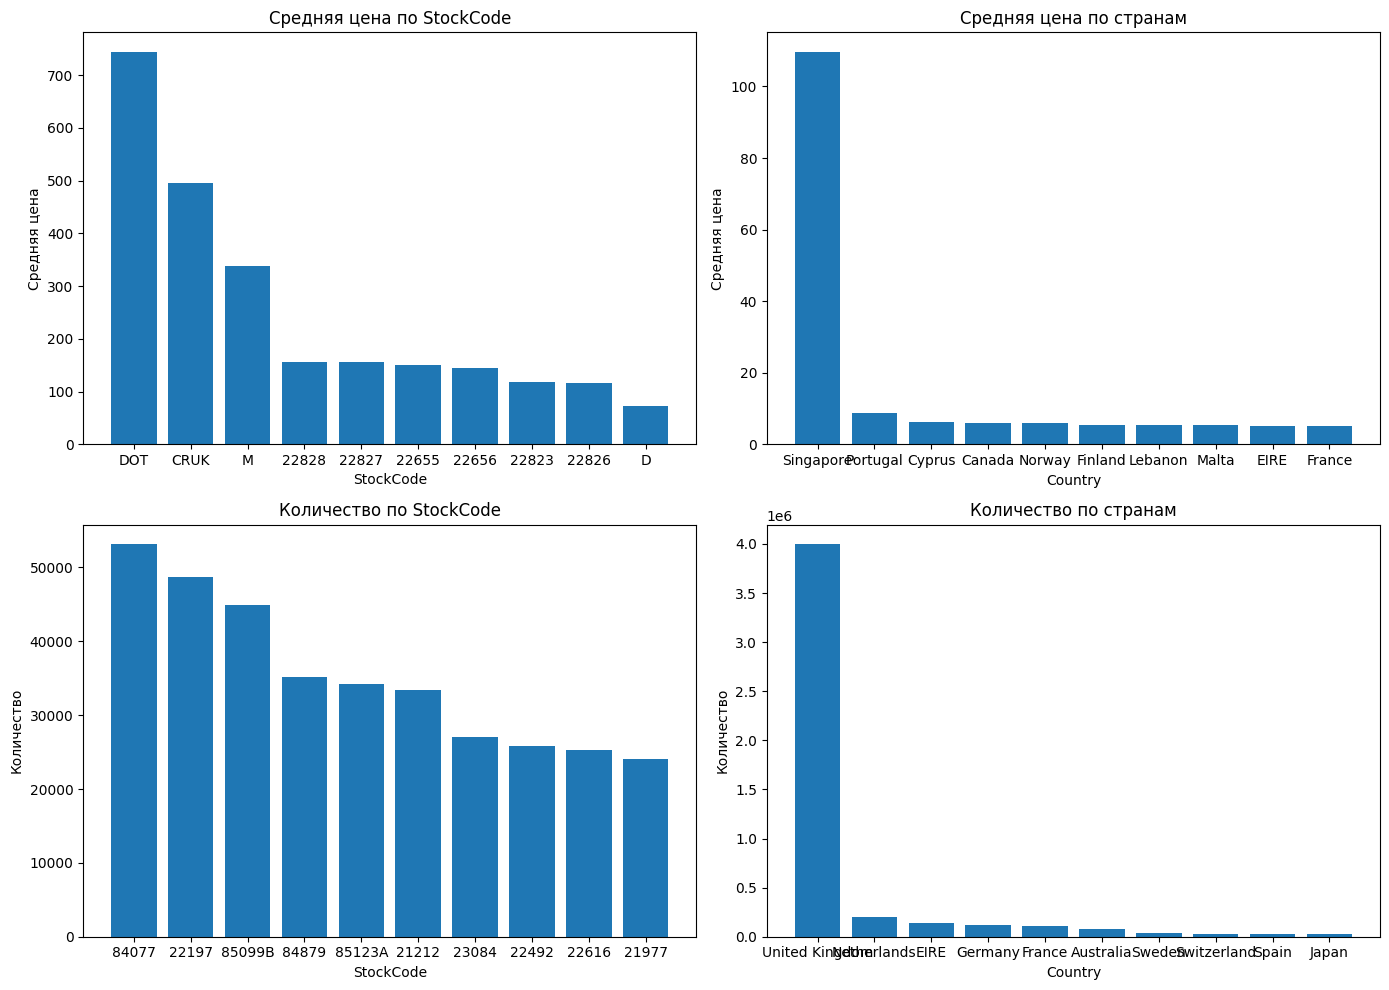

In [18]:
import matplotlib.pyplot as plt

top_avg_price_stockCode = avg_price_by_stockCode.nlargest(10, 'UnitPrice')  # Убрано 'first'
top_avg_price_country = avg_price_by_country.nlargest(10, 'UnitPrice')  # Убрано 'first'
top_quantity_stockCode = quantity_by_stockCode.nlargest(10, 'Quantity')  # Убрано 'first'
top_quantity_country = quantity_by_country.nlargest(10, 'Quantity')
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(top_avg_price_stockCode['StockCode'], top_avg_price_stockCode['UnitPrice'])
axs[0, 0].set_title('Средняя цена по StockCode')
axs[0, 0].set_xlabel('StockCode')
axs[0, 0].set_ylabel('Средняя цена')

axs[0, 1].bar(top_avg_price_country['Country'], top_avg_price_country['UnitPrice'])
axs[0, 1].set_title('Средняя цена по странам')
axs[0, 1].set_xlabel('Country')
axs[0, 1].set_ylabel('Средняя цена')

axs[1, 0].bar(top_quantity_stockCode['StockCode'], top_quantity_stockCode['Quantity'])
axs[1, 0].set_title('Количество по StockCode')
axs[1, 0].set_xlabel('StockCode')
axs[1, 0].set_ylabel('Количество')

axs[1, 1].bar(top_quantity_country['Country'], top_quantity_country['Quantity'])
axs[1, 1].set_title('Количество по странам')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Количество')

plt.tight_layout()

plt.show()


In [19]:
last_purchase_date = df['InvoiceDate'].max()

df['Recency'] = (last_purchase_date - df['InvoiceDate']).dt.days

rfm = df.groupby('CustomerID').agg({
    'Recency': 'min',  
    'InvoiceNo': 'count',  
    'UnitPrice': 'sum'  
}).rename(columns={'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})


In [20]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,2.08
12347.0,1,182,481.21
12348.0,74,31,178.71
12349.0,18,73,605.10
12350.0,309,17,65.30
...,...,...,...
18280.0,277,10,47.65
18281.0,180,7,39.36
18282.0,7,13,62.68


In [21]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])


In [22]:
rfm.head(5)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,325,2,2.08,1,1,1
12347.0,1,182,481.21,4,4,4
12348.0,74,31,178.71,2,2,3
12349.0,18,73,605.10,3,3,4
12350.0,309,17,65.30,1,1,2


In [23]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [24]:
def rfm_segment(row):
    if row['RFM_Score'] == '444':
        return 'VIP'
    elif row['RFM_Score'] in ['443', '344', '433']:
        return 'Loyal'
    elif row['RFM_Score'].startswith('1'):
        return 'At Risk'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)


In [25]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,2,2.08,1,1,1,111,At Risk
12347.0,1,182,481.21,4,4,4,444,VIP
12348.0,74,31,178.71,2,2,3,223,Other
12349.0,18,73,605.10,3,3,4,334,Other
12350.0,309,17,65.30,1,1,2,112,At Risk


In [26]:
segment_counts= rfm['Segment'].value_counts()
segment_counts

Segment
Other      2249
At Risk    1088
Loyal       529
VIP         506
Name: count, dtype: int64

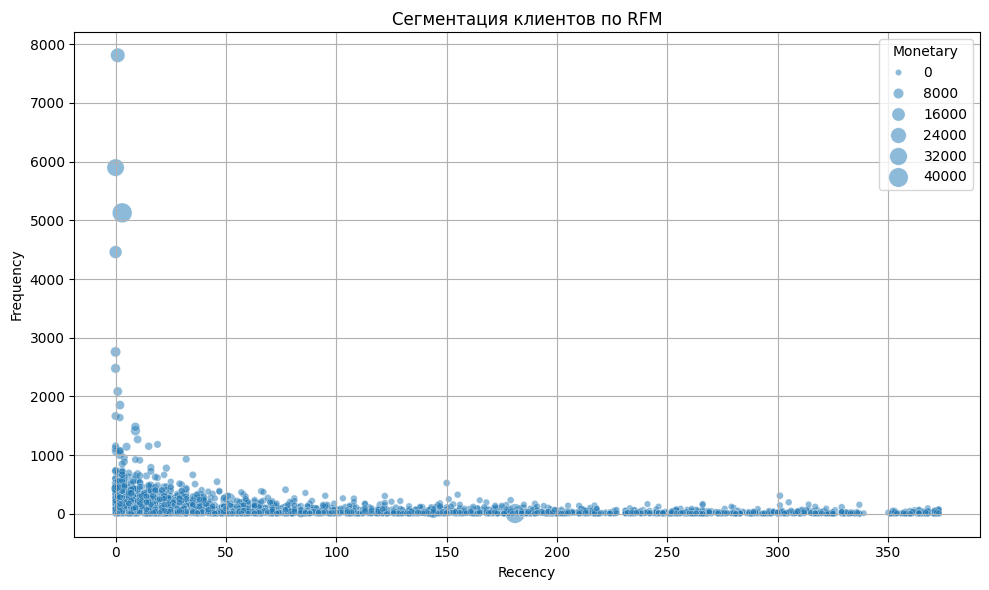

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', sizes=(20, 200), alpha=0.5)
plt.title('Сегментация клиентов по RFM')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Monetary')
plt.grid(True)
plt.tight_layout()
plt.show()

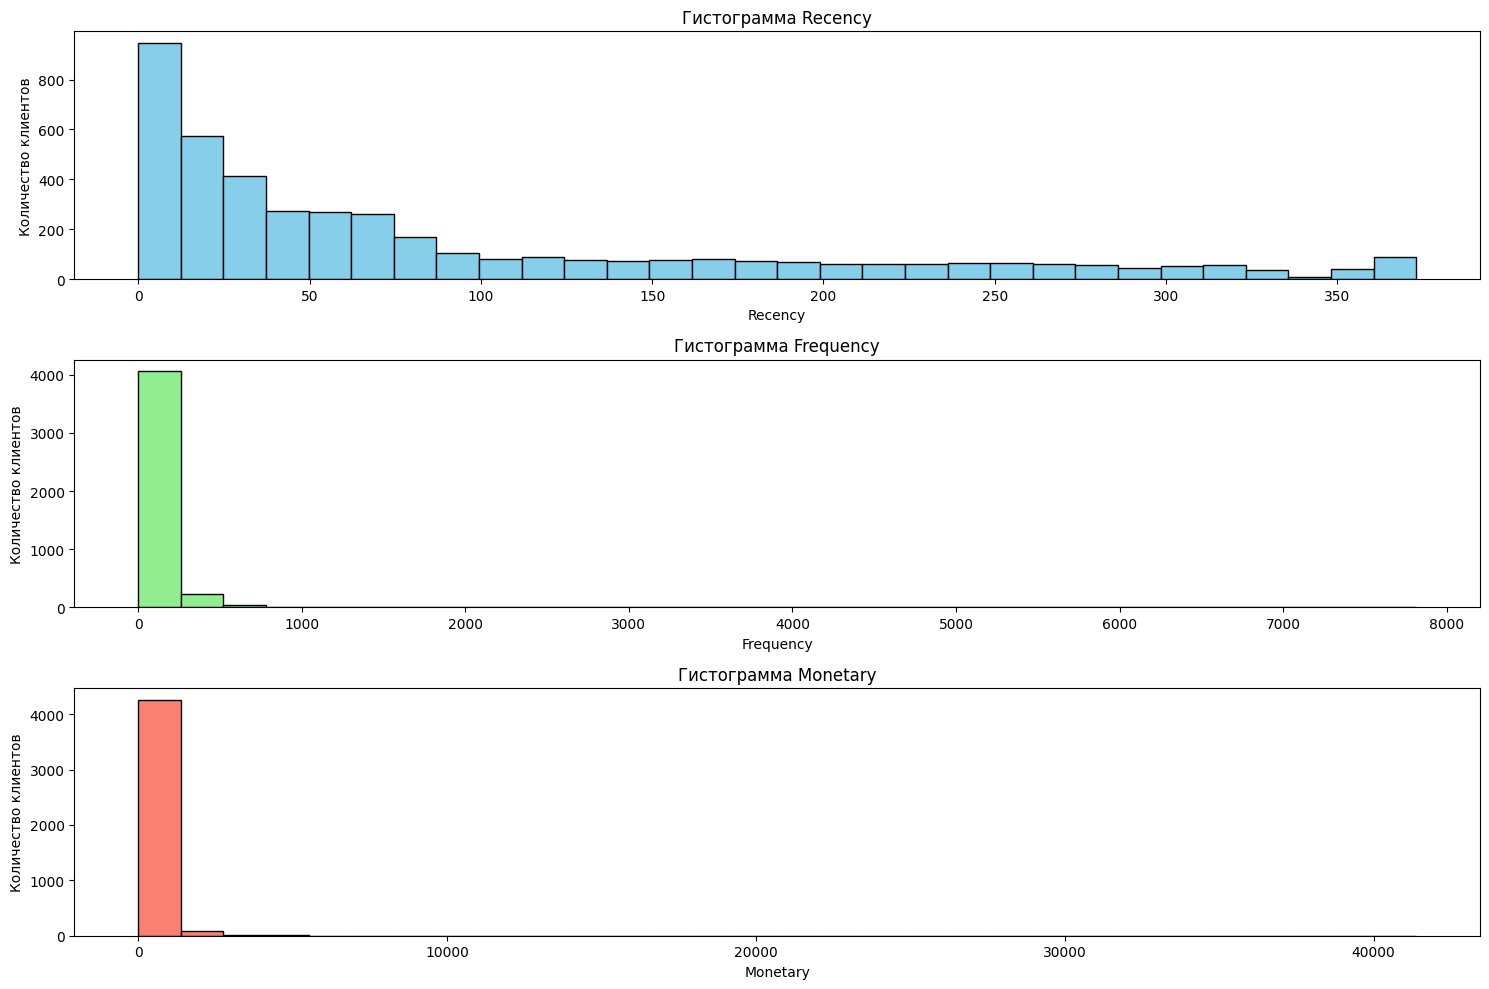

In [28]:

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)  
plt.hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма Recency')
plt.xlabel('Recency')
plt.ylabel('Количество клиентов')

plt.subplot(3, 1, 2)  
plt.hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Гистограмма Frequency')
plt.xlabel('Frequency')
plt.ylabel('Количество клиентов')

plt.subplot(3, 1, 3)  
plt.hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Гистограмма Monetary')
plt.xlabel('Monetary')
plt.ylabel('Количество клиентов')

plt.tight_layout()  
plt.show()

In [29]:
df['day_name']= df['InvoiceDate'].dt.day_name()
df['month_name']= df['InvoiceDate'].dt.month_name()

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,day_name,month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,Wednesday,December


In [31]:
purchases_by_day = df['day_name'].value_counts()
purchases_by_day


day_name
Thursday     81575
Wednesday    69753
Tuesday      67376
Monday       65715
Sunday       61673
Friday       55512
Name: count, dtype: int64

In [32]:
purchases_by_month = df['month_name'].value_counts()
purchases_by_month

month_name
November     64232
October      49928
December     43736
September    40459
May          28661
June         27576
March        27516
August       27444
July         27256
April        22988
January      21670
February     20138
Name: count, dtype: int64

In [33]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,2,2.08,1,1,1,111,At Risk
12347.0,1,182,481.21,4,4,4,444,VIP
12348.0,74,31,178.71,2,2,3,223,Other
12349.0,18,73,605.10,3,3,4,334,Other
12350.0,309,17,65.30,1,1,2,112,At Risk
...,...,...,...,...,...,...,...,...
18280.0,277,10,47.65,1,1,1,111,At Risk
18281.0,180,7,39.36,1,1,1,111,At Risk
18282.0,7,13,62.68,4,1,2,412,Other


In [34]:
from sklearn.model_selection import train_test_split

X = rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]
y = rfm['Segment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


C:\Users\Админ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [36]:
from sklearn.metrics import classification_report

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Random Forest Classification Report:
              precision    recall  f1-score   support

     At Risk       1.00      1.00      1.00       320
       Loyal       0.99      1.00      0.99       154
       Other       1.00      1.00      1.00       684
         VIP       1.00      1.00      1.00       154

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     At Risk       1.00      1.00      1.00       320
       Loyal       0.64      0.58      0.61       154
       Other       0.94      0.95      0.94       684
         VIP       0.83      0.85      0.84       154

    accuracy                           0.91      1312
   macro avg       0.85      0.85      0.85      1312
weighted avg       0.91      0.91      0.91      1312

